# Simple Linear Regression



In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing the Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data from link

In [20]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [21]:
#Reading the first five rows of data by head() function
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
#Reading the number of rows and columns in the data using shape() function
data.shape

(25, 2)

In [23]:
#Reading the names of heading of all the columns
data.columns

Index(['Hours', 'Scores'], dtype='object')

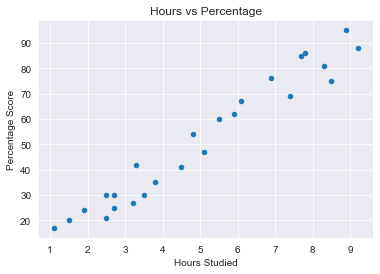

In [24]:
#Finding any relationship between data by plotting it
sns.set_style("darkgrid")
data.plot(x='Hours', y='Scores',kind='scatter')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The graph shows a straight line moving upwards i.e there is a positive linear relation between the number of hours studied and percentage of score.

## Splitting the Data 

For testing the data, it is essential to split the data into independent(Input) and dependent(Output) columns.

In [25]:
x= data.iloc[:,:-1].values   #independent
y= data.iloc[:,1].values     #dependent

In [26]:
x   #input variable

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [27]:
y  #output variable

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now we have to split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method.

In [28]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [29]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [30]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [31]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [32]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

## Training the Model 

After splitting the data, the next step is to train the model as to receive the best results. Here we import LinearRegression to train the model.

In [33]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(x_train, y_train) 

print("Training complete.")

Training complete.


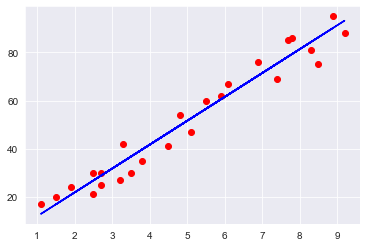

In [34]:
# Plotting the regression line
line = LR.coef_*x+LR.intercept_

# Plotting for the test data
plt.scatter(x, y,color="red")
plt.plot(x, line,color="blue");
plt.show()

## Visualising the Training set results

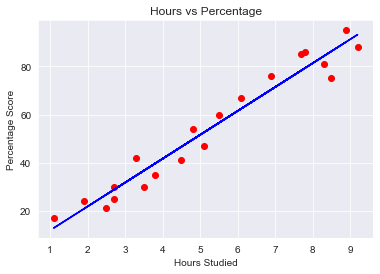

In [35]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, LR.predict(x_train), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Visualising the Test set results

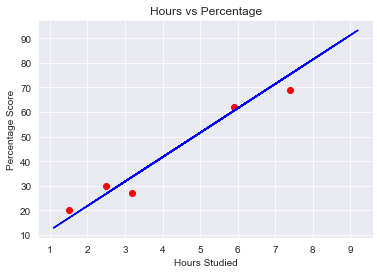

In [36]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, LR.predict(x_train), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Making prediction

In [37]:
y_pred = LR.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## What will be predicted score if a student studies for 9.25 hrs/day?

In [39]:
hours = 9.25
pred = LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
